### ANOVA

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf

%precision 3
%matplotlib inline

In [14]:
# 데이터 불러오기
food1 = pd.read_csv('c:/data/pj/food_clean+remove_outlier.csv')
food1.head()

,Lot_ID,Line,Shift,Operator,Temp,Humidity,Weight,Defect,Defect_Type
0,L003,A,주간,O8,26.400,42.900,99.920,0,양품
1,L029,B,주간,O2,24.300,57.700,101.770,0,양품
2,L035,A,주간,O4,23.500,44.300,99.820,0,양품
3,L039,C,주간,O3,24.400,38.200,100.600,0,양품
4,L018,A,야간,O9,26.500,44.400,99.760,0,양품


In [15]:
from statsmodels.formula.api import ols        # 회귀분석 기반
from statsmodels.stats.anova import anova_lm   # 분산분석

# 소수점 제한
pd.options.display.float_format = "{:.3f}".format

In [33]:
#중량 <> 온도 <> 습도 <> 작업자 --> ANOVA 분석
model_2 = ols('Weight ~ C(Line)*C(Operator)', food1).fit()
anova_lm(model_2)

,df,sum_sq,mean_sq,F,PR(>F)
C(Line),2.000,1.623,0.812,0.826,0.438
C(Operator),9.000,10.879,1.209,1.231,0.275
C(Line):C(Operator),18.000,33.089,1.838,1.871,0.017
Residual,385.000,378.198,0.982,NaN,NaN


In [34]:
food1['residual'] = model_2.resid       # 잔차
food1['fitted'] = model_2.fittedvalues  # 적합치
food1.head()

,Lot_ID,Line,Shift,Operator,Temp,Humidity,Weight,Defect,Defect_Type,residual,fitted
0,L003,A,주간,O8,26.400,42.900,99.920,0,양품,-0.243,100.163
1,L029,B,주간,O2,24.300,57.700,101.770,0,양품,1.327,100.443
2,L035,A,주간,O4,23.500,44.300,99.820,0,양품,0.320,99.500
3,L039,C,주간,O3,24.400,38.200,100.600,0,양품,0.866,99.734
4,L018,A,야간,O9,26.500,44.400,99.760,0,양품,-0.213,99.973


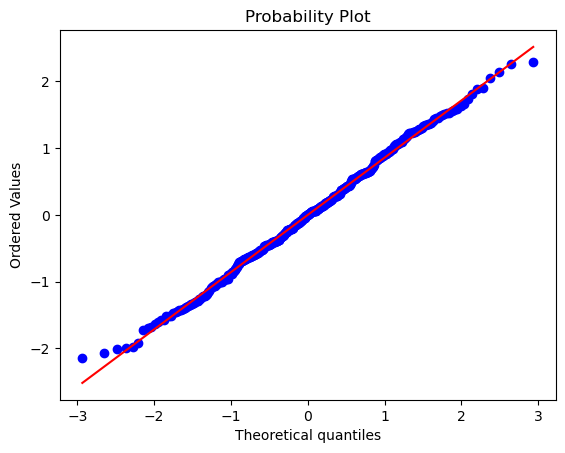

In [20]:
# 정규성 확인

stats.probplot(food1['residual'], plot = plt)
plt.show()

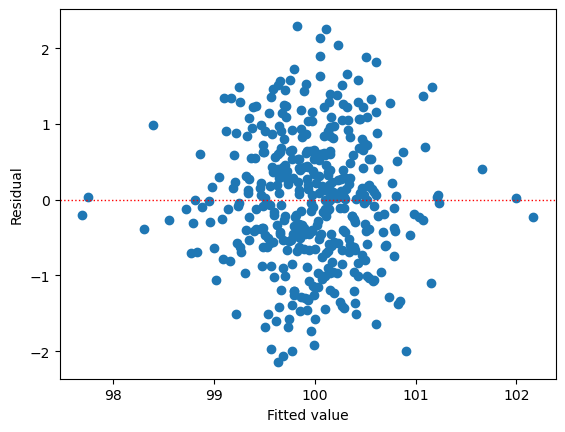

In [21]:
# 등분산성 확인

plt.scatter(food1['fitted'], food1['residual'])
plt.axhline(y=0, color = 'r', linewidth = 1, linestyle = 'dotted')
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.show()

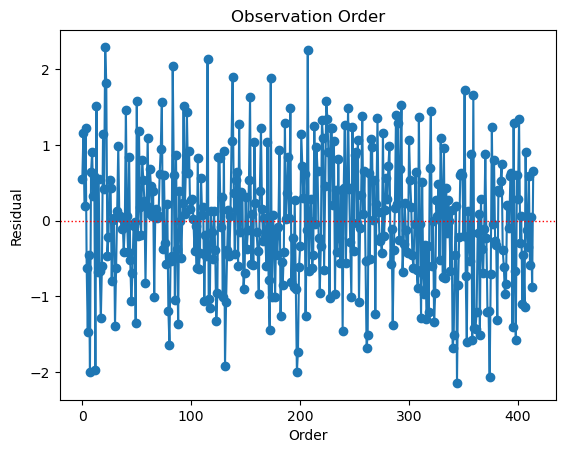

In [23]:
# 독립성 확인

plt.scatter(food1.index, food1['residual'])                   # 잔차를 관측 순서에 따라 
plt.plot(food1['residual'])                                       # 선 그래프 그리는 함수
plt.axhline(y=0, color = 'r', linewidth = 1, linestyle = 'dotted')    
plt.title("Observation Order")
plt.xlabel('Order')
plt.ylabel('Residual')
plt.show()

### 회귀분석

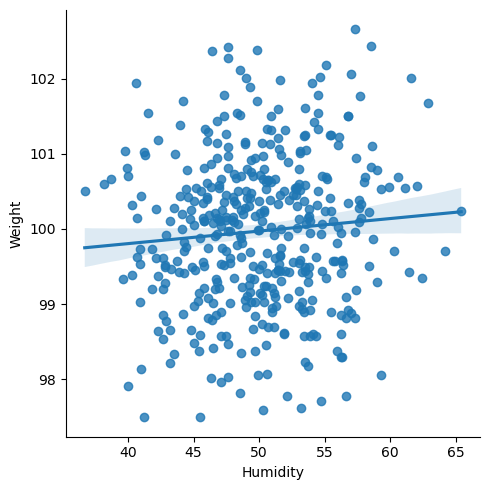

In [40]:
# 두 변수 간에 관계 파악
# sns.lmplot : 산점도에 회귀직선 추가 
sns.lmplot(x = 'Humidity', y = 'Weight', data = food1)
plt.show()

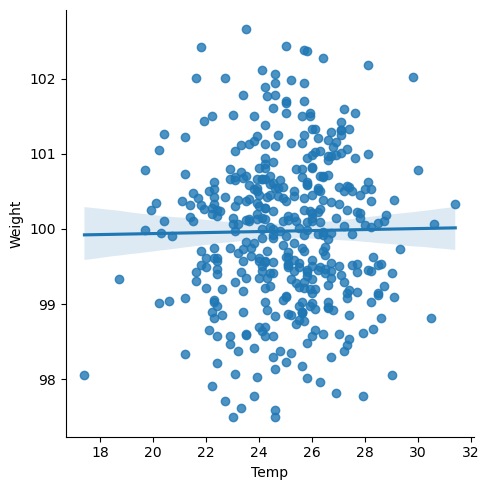

In [41]:
# 두 변수 간에 관계 파악
# sns.lmplot : 산점도에 회귀직선 추가 
sns.lmplot(x = 'Temp', y = 'Weight', data = food1)
plt.show()

In [43]:
# 단순 회귀분석 수행

import statsmodels.formula.api as smf
reg = smf.ols('Weight ~ Temp', food1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.08116
Date:                Tue, 09 Sep 2025   Prob (F-statistic):              0.776
Time:                        11:11:38   Log-Likelihood:                -593.17
No. Observations:                 415   AIC:                             1190.
Df Residuals:                     413   BIC:                             1198.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.8058      0.586    170.381      0.000      98.654     100.957
Temp           0.0067      0.023      0.285      0.776      -0.039       0.053
==============================================================================
Omnibus:                        1.531   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.465   Jarque-Bera (JB):                1.439
Skew:                           0.039   Prob(JB):                        0.487
Kurtosis:                       2.722   Cond. No.                         296.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# 단순 회귀분석 수행

import statsmodels.formula.api as smf
reg = smf.ols('Weight ~ Humidity', food1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.880
Date:                Tue, 09 Sep 2025   Prob (F-statistic):             0.0904
Time:                        11:12:45   Log-Likelihood:                -591.77
No. Observations:                 415   AIC:                             1188.
Df Residuals:                     413   BIC:                             1196.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.1365      0.495    200.350      0.000      98.164     100.109
Humidity       0.0167      0.010      1.697      0.090      -0.003       0.036
==============================================================================
Omnibus:                        1.774   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.412   Jarque-Bera (JB):                1.588
Skew:                           0.024   Prob(JB):                        0.452
Kurtosis:                       2.701   Cond. No.                         502.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
# 다중회귀분석
food1.loc[:,['Temp','Humidity','Weight',]].corr()

,Temp,Humidity,Weight
Temp,1.000,0.095,0.014
Humidity,0.095,1.000,0.083
Weight,0.014,0.083,1.000
